In [1]:
%matplotlib inline

from asteria import config, source, IO
from asteria.interactions import Interactions
from asteria.neutrino import Flavor

import astropy.units as u

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Set up styles for plotting

In [2]:
axes_style =   {            'grid' : 'True',
                       'labelsize' : '20',
                        'labelpad' : '8.0'}

xtick_style =  {       'direction' : 'in',
                       'labelsize' : '14.',
                      'major.size' : '15.',   
                     'major.width' : '1.',
                   'minor.visible' : 'True',
                      'minor.size' : '7.5',
                     'minor.width' : '1.' }

ytick_style =  {       'direction' : 'in',
                       'labelsize' : '14.',
                      'major.size' : '15.',   
                     'major.width' : '1.',
                   'minor.visible' : 'True',
                      'minor.size' : '7.5',
                     'minor.width' : '1.' }

grid_style =   {           'alpha' : '0.75' }
legend_style = {        'fontsize' : '14' }
font_syle =    {            'size' : '16' }
figure_style = {  'subplot.hspace' : '0.05' }

mpl.rc(   'font', **font_syle )
mpl.rc(   'axes', **axes_style )
mpl.rc(  'xtick', **xtick_style )
mpl.rc(  'ytick', **ytick_style )
mpl.rc(   'grid', **grid_style )
mpl.rc( 'legend', **legend_style )
mpl.rc( 'figure', **figure_style )

## Load Configuration

This will load the source configuration from a file.

For this to work, either the user needs to have done one of two things:
1. Run `python setup.py install` in the ASTERIA directory.
2. Run `python setup.py develop` and set the environment variable `ASTERIA` to point to the git source checkout.

If these were not done, the initialization will fail because the paths will not be correctly resolved.

In [3]:
conf = config.load_config('../../data/config/test.yaml')
ccsn = source.initialize(conf)

## Prepare Iterables

Define the range of neutrino energies (`Enu`) to simulate and the times (`time`) at which to perform the simulation. 

In [4]:
# Define neutrino energy spectrum
E_min = 0.1; E_max = 100.1; dE = 0.1;
Enu = np.arange(E_min, E_max, dE) * u.MeV

# Define post-bounce times at which to evaluate
t_min = -1; t_max = 15; dt = 0.0001;
time = np.arange(t_min, t_max, dt) * u.s

## Load Simulation and Compute Signal per DOM

Import a simulation from the file `\data\processed\sukhbold-SFHo-z9.6.h5` using `IO.load()`. It is assumed that this file has already been generated$^*$. This file is specific to the model and its path is stored in the `conf` object. The parameters are as follows...

- `Interactions` The enumeration of the neutrino interactions used to perform the simulation
- `Flavor` The enumeration of the neutrino flavors used to perform the simulation
- `Enu` The Energy resolution at which cross sections, lepton mean energy, and the source PDFs were binned.
- `Time` The Time resolution at which the simulation profile is binned.

If no object is found, `None` will be returned.


The code to save a simulation to file is as follows...

```IO.save(conf, Interactions, Flavor, Enu.value, time.value, result)```

Where `result` is the photonic energy deposition in 1 m$^3$ of ice scaled to a progenitor that is 1 kpc away. This is scaled to progenitor distance of the source and the effective volume of a DOM to find the expected signal increase for a single DOM.


$^*$__NOTE (04/29/19)__: This simulation was saved in `\docs\nb\detector_response.ipynb`. The simulation is not performed here to redeuce the scope of this notebook. If `\data\processed\sukhbold-SFHo-z9.6.h5` has not been generated, run the notebook mentioned above.

In [5]:
effvol = 0.1654 * u.m**3 / u.MeV

E_per_V = IO.load(conf, Interactions, Flavor, Enu.value, time.value) * u.MeV / u.m**3
E_per_V /= ccsn.progenitor_distance.to(u.kpc).value**2
signal_per_DOM = effvol * E_per_V 

## Plot Signal Increase Per DOM

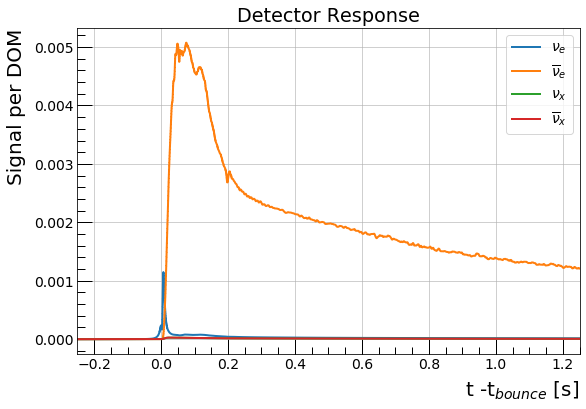

In [6]:
fig, ax = plt.subplots(1,1, figsize=(9,6))

for nu, flavor in enumerate(Flavor):
    ax.step( time, signal_per_DOM[nu], label=flavor.to_tex(), linewidth=2)
    
ax.set_ylabel( 'Signal per DOM', horizontalalignment='right', y = 1)
ax.set_xlabel( 't -t$_{bounce}$ [s]', horizontalalignment='right', x = 1)
ax.set(title = 'Detector Response', 
       xlim = [-0.25, 1.25] )
ax.legend();